In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier 
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv('Project_Database_NoOutliers_Encoded.csv')
df

,Unnamed: 0,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,loudness,...,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness,anomaly,mood_encoded,genre_encoded
0,0,Miley Cyrus,0.652,0.470,96.021,0.0886,Party In The U.S.A.,78.0,0.0420,-4.667,...,party,9,1.918977,butterflies,11,19.402985,0,1,4,161
1,1,Green Day,0.567,0.416,159.779,0.2220,21 Guns,75.0,0.0355,-4.939,...,love,14,2.473498,leatherstudded,14,5.300353,0,-1,4,164
2,2,Miley Cyrus,0.336,0.299,161.010,0.1410,The Climb,72.0,0.0325,-6.354,...,believe,6,1.749271,everything,10,22.448980,0,1,4,161
3,3,Lady Gaga,0.696,0.714,119.001,0.0842,Bad Romance,78.0,0.0363,-3.755,...,got,10,2.032520,replayayayay,12,12.804878,0,1,4,161
4,4,Owl City,0.513,0.461,180.118,0.1180,Fireflies,78.0,0.0439,-6.800,...,so,8,2.359882,everything,10,20.058997,0,1,4,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12118,12123,Lutov Doko,0.564,0.715,76.583,0.2220,Simghera,47.0,0.0536,-8.206,...,Not Found,7,1.804124,Not Found,10,19.277108,0,1,1,217
12119,12124,Ramil',0.789,0.457,135.100,0.1160,Из-за тебя,60.0,0.1820,-8.621,...,Not Found,7,1.804124,Not Found,10,19.277108,0,1,2,217
12120,12125,DYSTINCT,0.760,0.544,100.021,0.2220,Habiba (feat. Tawsen),67.0,0.0539,-5.032,...,Not Found,7,1.804124,Not Found,10,19.277108,0,1,1,161
12121,12126,Greg Willen,0.657,0.342,90.006,0.2220,Marvin Vettori - The Italian Dream,63.0,0.1740,-4.554,...,Not Found,7,1.804124,Not Found,10,19.277108,0,1,1,170


In [88]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed', case=False)]
df = df.drop(['artist','song','release_date','1st_word','longest_word','anomaly','2nd_word','3rd_word','4th_word','5th_word','5th_word_percentage','4th_word_percentage','popularity','year','1st_occurence','2nd_occurence','3rd_occurence','4th_occurence','5th_occurence'],axis = 1)
list(df)

['danceability',
 'valence',
 'tempo',
 'liveness',
 'speechiness',
 'loudness',
 'duration_ms',
 'energy',
 'acousticness',
 'mode',
 'instrumentalness',
 'key',
 'artist_popularity',
 'artist_followers',
 'hit',
 'words_count',
 'words_average_size',
 '1st_word_percentage',
 '2nd_word_percentage',
 '3rd_word_percentage',
 'longest_word_length',
 'unique_word_percentage',
 'Explicitness',
 'mood_encoded',
 'genre_encoded']

### Interpretation

Summary:
MSE shows how far off the predictions are on average, with lower values being better.

R² means that the model explains about (value)% of the variance in the target variable, which suggests room for improvement.

If your R² is low, it might be worth considering:

Adding more features.

Trying different models (e.g., polynomial regression, decision trees, etc.).

Checking for data preprocessing or feature engineering opportunities.

Let me know if you'd like to dive deeper into improving model performance!



In [63]:
# Set experiment to be logged in MLflow
mlflow.set_experiment("Hit Song Prediction v4")

X = df.drop('hit', axis=1)
y = df['hit']

# Start MLflow run
with mlflow.start_run() as run:


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    mlflow.log_param("scaler", "StandardScaler")

    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)
    mlflow.log_param("pca_type", "PCA")
    mlflow.log_param("pca_n_components", pca.n_components_)
    mlflow.log_param("pca_variance_ratio_sum", round(sum(pca.explained_variance_ratio_), 4))

    test_size = 0.2
    random_state = 42
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=random_state)

    mlflow.log_param("test_size", test_size)
    mlflow.log_param("random_state", random_state)

    model = LogisticRegression(random_state=random_state)
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_params(model.get_params())

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    mlflow.log_metric("accuracy", accuracy)

    with open("classification_report.txt", "w") as f:
        f.write(class_report)
    mlflow.log_artifact("classification_report.txt")

    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    mlflow.sklearn.log_model(model, "logistic_model")

    print(f"Run completed. Run ID: {run.info.run_id}")
    print(f"Accuracy: {accuracy:.2f}")


2025/05/15 15:41:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run completed. Run ID: aea68cec3ef14010806fba94b8981f47
Accuracy: 0.79


### Using Logistic Regression

### Using Logistic Regression WITH MLFLOW

In [64]:
X = df.drop('hit', axis=1) 
y = df['hit']  
mlflow.set_experiment("Hit Song Prediction v4")

with mlflow.start_run():

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("pca_components", pca.n_components_)
    mlflow.log_metric("accuracy", accuracy)

    mlflow.sklearn.log_model(model, "model")

    with open("classification_report.txt", "w") as f:
        f.write(class_report)
    mlflow.log_artifact("classification_report.txt")

    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)


2025/05/15 15:41:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.79
Confusion Matrix:
[[951 254]
 [260 960]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1205
           1       0.79      0.79      0.79      1220

    accuracy                           0.79      2425
   macro avg       0.79      0.79      0.79      2425
weighted avg       0.79      0.79      0.79      2425



In [65]:
correct_predictions = (y_test == y_pred) 
incorrect_predictions = (y_test != y_pred)

correct_percentage = correct_predictions.mean() * 100
incorrect_percentage = incorrect_predictions.mean() * 100

print(f"Percentage of Correct Predictions: {correct_percentage:.2f}%")
print(f"Percentage of Incorrect Predictions: {incorrect_percentage:.2f}%")

Percentage of Correct Predictions: 78.80%
Percentage of Incorrect Predictions: 21.20%


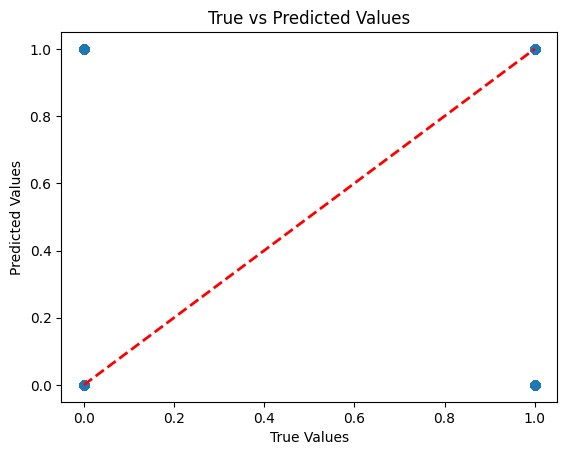

In [66]:
residuals = y_test - y_pred

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


In [67]:
correct_predictions = (y_test == y_pred) 
incorrect_predictions = (y_test != y_pred)

correct_percentage = correct_predictions.mean() * 100
incorrect_percentage = incorrect_predictions.mean() * 100

print(f"Percentage of Correct Predictions: {correct_percentage:.2f}%")
print(f"Percentage of Incorrect Predictions: {incorrect_percentage:.2f}%")

Percentage of Correct Predictions: 78.80%
Percentage of Incorrect Predictions: 21.20%


### Using Random Forest Classifier

   Feature  Importance
2      PC3    0.230576
4      PC5    0.077590
19    PC20    0.061132
0      PC1    0.047793
10    PC11    0.042576
18    PC19    0.041765
12    PC13    0.040519
16    PC17    0.038042
3      PC4    0.037498
15    PC16    0.037395
11    PC12    0.036301
5      PC6    0.036260
14    PC15    0.035445
1      PC2    0.034926
17    PC18    0.034789
7      PC8    0.034520
8      PC9    0.034171
6      PC7    0.034111
9     PC10    0.033259
13    PC14    0.031333


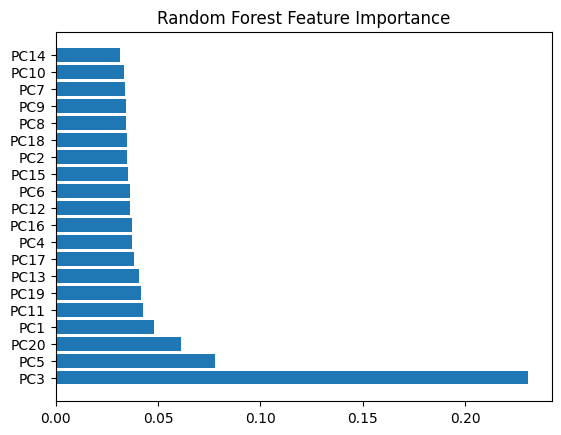

Mean Squared Error: 0.21360824742268042
R-squared: 0.14553431739337475


2025/05/15 15:41:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.79
Confusion Matrix:
[[974 231]
 [287 933]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1205
           1       0.80      0.76      0.78      1220

    accuracy                           0.79      2425
   macro avg       0.79      0.79      0.79      2425
weighted avg       0.79      0.79      0.79      2425



In [68]:
X = df.drop('hit', axis=1)
y = df['hit'] 
mlflow.set_experiment("Hit Song Prediction v4")

with mlflow.start_run():
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=0.95) 
    X_pca = pca.fit_transform(X_scaled)
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    model.fit(X_train, y_train)
    
    
    importances = pd.DataFrame({
        'Feature': [f'PC{i+1}' for i in range(X_pca.shape[1])],
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(importances)
    
    plt.barh(importances['Feature'], importances['Importance'])
    plt.title('Random Forest Feature Importance')
    plt.show()
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_param("pca_components", pca.n_components_)
    mlflow.log_metric("accuracy", accuracy)

    mlflow.sklearn.log_model(model, "model")

    with open("classification_report.txt", "w") as f:
        f.write(class_report)
    mlflow.log_artifact("classification_report.txt")

    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)



In [69]:
var_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
var_ratio_cumulative
summary_table = [pca.explained_variance_, pca.explained_variance_ratio_, var_ratio_cumulative]
summary_table = pd.DataFrame(summary_table).T
summary_table.columns =["explained_var", "var_ratio", "var_ratio_cumulative"]
summary_table

,explained_var,var_ratio,var_ratio_cumulative
0,2.771842,0.115484,0.115484
1,2.452770,0.102190,0.217674
2,1.849473,0.077055,0.294729
3,1.515331,0.063134,0.357863
4,1.406298,0.058591,0.416454
5,1.254236,0.052256,0.468709
6,1.132166,0.047170,0.515879
7,1.102650,0.045940,0.561819
8,1.020980,0.042537,0.604356
9,0.992256,0.041341,0.645697


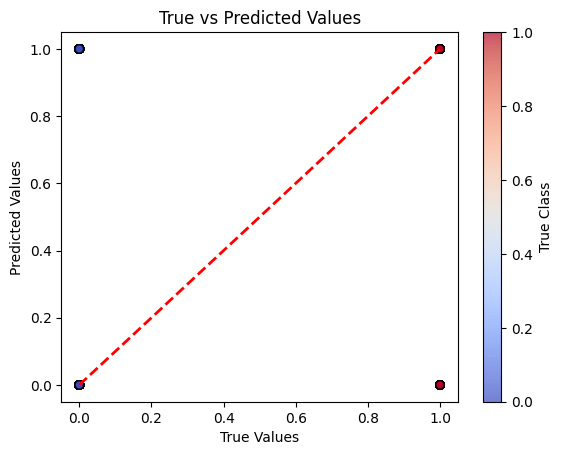

In [70]:

residuals = y_test - y_pred

plt.scatter(y_test, y_pred, c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

plt.colorbar(label='True Class')
plt.show()

In [71]:
y_test

4960    1
2088    1
396     1
6386    0
2619    1
       ..
4560    1
3274    1
4096    1
568     1
5289    1
Name: hit, Length: 2425, dtype: int64

In [72]:
correct_predictions = (y_test == y_pred) 
incorrect_predictions = (y_test != y_pred)

correct_percentage = correct_predictions.mean() * 100
incorrect_percentage = incorrect_predictions.mean() * 100

print(f"Percentage of Correct Predictions: {correct_percentage:.2f}%")
print(f"Percentage of Incorrect Predictions: {incorrect_percentage:.2f}%")


Percentage of Correct Predictions: 78.64%
Percentage of Incorrect Predictions: 21.36%


### Neural Networks (Deep Learning)

In [73]:
X = df.drop('hit', axis=1)
y = df['hit']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.26103092783505155
R-squared: -0.044163662335895415


In [74]:
correct_predictions = (y_test == y_pred) 
incorrect_predictions = (y_test != y_pred)

correct_percentage = correct_predictions.mean() * 100
incorrect_percentage = incorrect_predictions.mean() * 100

print(f"Percentage of Correct Predictions: {correct_percentage:.2f}%")
print(f"Percentage of Incorrect Predictions: {incorrect_percentage:.2f}%")


Percentage of Correct Predictions: 73.90%
Percentage of Incorrect Predictions: 26.10%


### Gradiant Boosting Model

   Feature  Importance
2      PC3    0.607765
4      PC5    0.132644
19    PC20    0.044256
12    PC13    0.027882
0      PC1    0.023680
18    PC19    0.020694
5      PC6    0.019827
11    PC12    0.019145
16    PC17    0.018488
15    PC16    0.014993
3      PC4    0.011609
10    PC11    0.011032
1      PC2    0.010264
14    PC15    0.009878
17    PC18    0.009499
7      PC8    0.006347
6      PC7    0.005854
8      PC9    0.003601
9     PC10    0.001699
13    PC14    0.000842


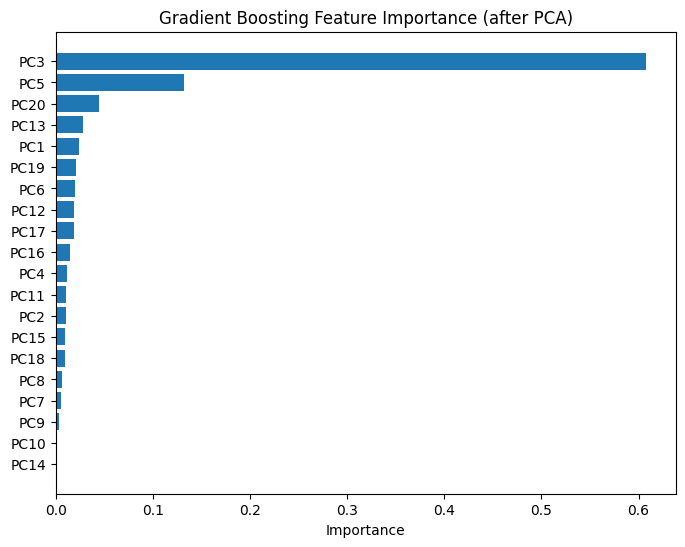

Accuracy: 0.7826804123711341
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      1205
           1       0.81      0.75      0.78      1220

    accuracy                           0.78      2425
   macro avg       0.78      0.78      0.78      2425
weighted avg       0.78      0.78      0.78      2425



In [93]:
X = df.drop('hit', axis=1)
y = df['hit']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components= 0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': [f'PC{i+1}' for i in range(X_pca.shape[1])],
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(importances)

plt.figure(figsize=(8, 6))
plt.barh(importances['Feature'], importances['Importance'])
plt.gca().invert_yaxis()
plt.title('Gradient Boosting Feature Importance (after PCA)')
plt.xlabel('Importance')
plt.show()

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [94]:
correct_predictions = (y_test == y_pred) 
incorrect_predictions = (y_test != y_pred)

correct_percentage = correct_predictions.mean() * 100
incorrect_percentage = incorrect_predictions.mean() * 100

print(f"Percentage of Correct Predictions: {correct_percentage:.2f}%")
print(f"Percentage of Incorrect Predictions: {incorrect_percentage:.2f}%")

Percentage of Correct Predictions: 78.27%
Percentage of Incorrect Predictions: 21.73%


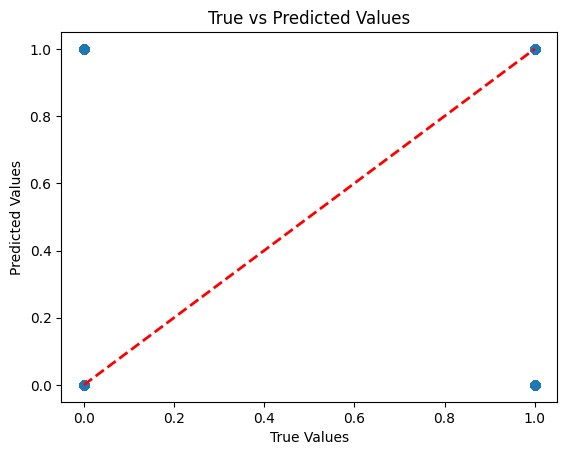

In [95]:
residuals = y_test - y_pred

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


In [96]:
hit_threshold = 5 

hits = sum(abs(y_test - y_pred) <= hit_threshold)
misses = len(y_test) - hits

print(f'Number of hits (predictions within {hit_threshold} of actual value): {hits}')
print(f'Number of misses (predictions outside of {hit_threshold}): {misses}')


Number of hits (predictions within 5 of actual value): 2425
Number of misses (predictions outside of 5): 0
